In [1]:
# 1. Core business problem being solved
#   To identify the flight fares
# 2. who is the stakeholder
#   Finance Manager 
# 3. Business metric
# 4. Data sci metric
# 5. EDA Questions important for Stakeholder
# 6. Simple Model
# 7. Feature Selection
# 8. Feature Engg

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('data/train.csv')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [5]:
train_data.shape

(8012, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 375.6+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data[train_data['Route'].isnull() & train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1807,Airline C,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(axis = 0, inplace=True)
train_data.shape

(8011, 11)

In [10]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663
5,Airline E,27/06/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info,3625
6,Airline A,3/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 04 Jun,22h,2 stops,In-flight meal not included,10919
7,Airline C,24/06/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,5510
8,Airline A,12/06/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:30,12:35,7h 5m,2 stops,No info,14441
9,Airline G,9/06/2019,Delhi,Cochin,DEL → BLR → COK,16:45,22:25,5h 40m,1 stop,No info,13470


In [11]:
train_data['Total_Stops'].value_counts()

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

In [12]:
## Feature Engineering
train_data.replace(to_replace ="non-stop", value = "0", inplace=True)
train_data.replace(to_replace ="1 stop", value = "1", inplace=True)
train_data.replace(to_replace ="2 stops", value = "2", inplace=True)
train_data.replace(to_replace ="3 stops", value = "3", inplace=True)

In [13]:
train_data['Total_Stops'] = train_data['Total_Stops'].astype(int)

In [14]:
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})

In [15]:
train_data['Additional_Info'].value_counts()

No info                         6253
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
Change airports                    2
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [16]:
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1048,Airline A,15/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 16 Jun,22h 55m,2,In-flight meal not included,10368
1331,Airline A,12/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 13 Jun,22h,2,In-flight meal not included,10919
1421,Airline A,15/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 16 Jun,22h 55m,2,No info,13014
1909,Airline A,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,04:25 23 Mar,33h 15m,2,In-flight meal not included,8834
2000,Airline C,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 10 May,21h 15m,2,No info,10441
...,...,...,...,...,...,...,...,...,...,...,...
7800,Airline A,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2,No info,12819
7833,Airline C,18/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 19 May,21h 15m,2,No info,10441
7851,Airline A,21/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,16:10,18:50 22 Mar,26h 40m,2,In-flight meal not included,8728
7923,Airline C,21/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 22 May,26h,2,No info,11972


In [17]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7894 non-null   object
 1   Date_of_Journey  7894 non-null   object
 2   Source           7894 non-null   object
 3   Destination      7894 non-null   object
 4   Route            7894 non-null   object
 5   Dep_Time         7894 non-null   object
 6   Arrival_Time     7894 non-null   object
 7   Duration         7894 non-null   object
 8   Total_Stops      7894 non-null   int32 
 9   Additional_Info  7894 non-null   object
 10  Price            7894 non-null   int64 
dtypes: int32(1), int64(1), object(9)
memory usage: 431.7+ KB


In [19]:
# Duration convert hours in min.
train_data['Duration'] = train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [20]:
# Date_of_Journey
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)

# Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train_data['Arrival_day'] = pd.to_datetime(train_data.Arrival_Time).dt.day
train_data['Arrival_month'] = pd.to_datetime(train_data.Arrival_Time).dt.month
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [21]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

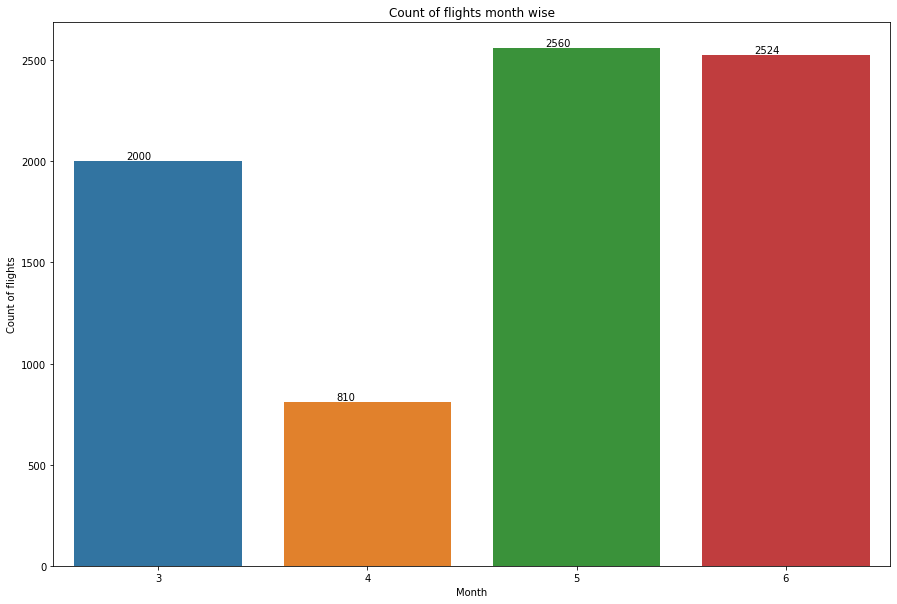

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [23]:
## As its India and its summer vacations we observe month May has highest number of air travel

In [24]:
train_data["Airline"].value_counts()

Airline A    2807
Airline B    1545
Airline C    1252
Airline D     906
Airline E     622
Airline F     359
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

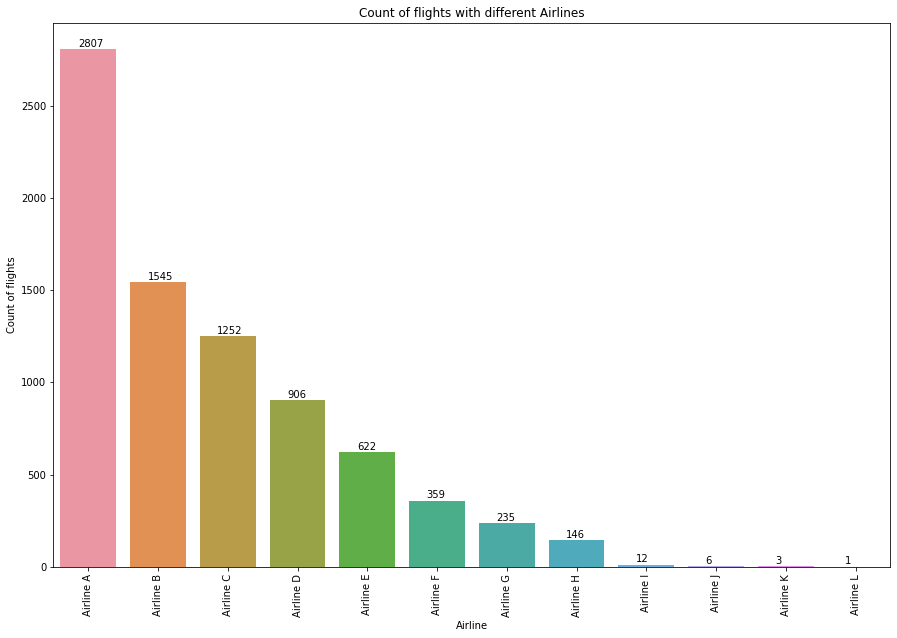

In [25]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data, order=train_data['Airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [26]:
# Airline
train_data["Airline"].replace(
    {'Airline I':'Other', 
    'Airline J':'Other',
    'Airline K':'Other', 
    'Airline L':'Other'}, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

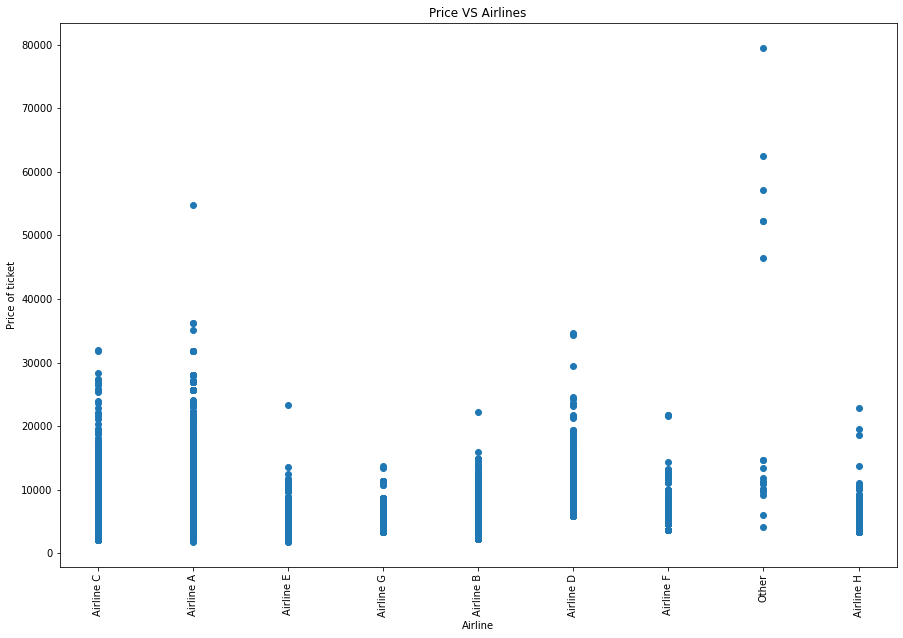

In [27]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Price of ticket')

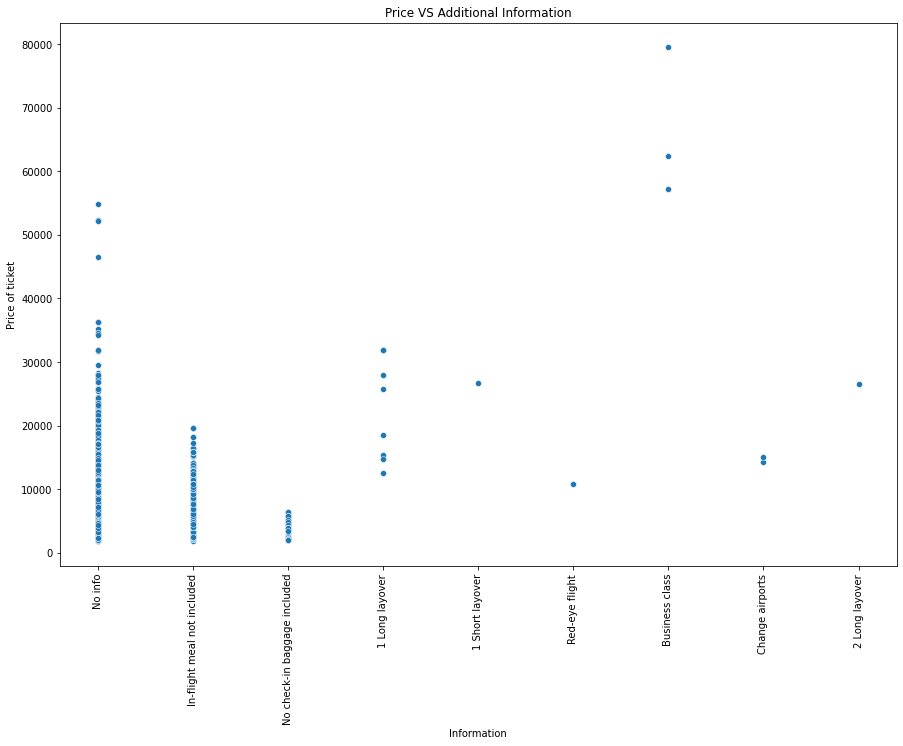

In [28]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(train_data['Additional_Info'], train_data['Price'],data=train_data)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

In [29]:
# Additional_Info
train_data["Additional_Info"].replace(
    {'1 Short layover':'Other', 
    'Red-eye flight':'Other',
    'Business class':'Other', 
    'Change airports':'Other',
    '2 Long layover': 'Other'}, inplace=True)

In [30]:
train_categorical_data = train_data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = train_data.select_dtypes(include=['int64', 'float','int32'])

In [31]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,Airline C,Delhi,Cochin,DEL → MAA → COK,No info
1,Airline A,Banglore,Delhi,BLR → DEL,No info
2,Airline C,Delhi,Cochin,DEL → BOM → COK,No info
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included


In [32]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

In [33]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,2,2,1,115,3
1,0,0,2,17,3
2,2,2,1,98,3
3,0,3,0,61,1
4,0,3,0,61,1


In [34]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']

In [35]:
# Models

In [36]:
!pip install xgboost

oost\include\xgboost
    copying xgboost\include\xgboost\predictor.h -> build\lib.win32-3.8\xgboost\include\xgboost
    copying xgboost\include\xgboost\span.h -> build\lib.win32-3.8\xgboost\include\xgboost
    copying xgboost\include\xgboost\tree_model.h -> build\lib.win32-3.8\xgboost\include\xgboost
    copying xgboost\include\xgboost\tree_updater.h -> build\lib.win32-3.8\xgboost\include\xgboost
    copying xgboost\include\xgboost\version_config.h -> build\lib.win32-3.8\xgboost\include\xgboost
    creating build\lib.win32-3.8\xgboost\plugin
    copying xgboost\plugin\CMakeLists.txt -> build\lib.win32-3.8\xgboost\plugin
    copying xgboost\plugin\README.md -> build\lib.win32-3.8\xgboost\plugin
    creating build\lib.win32-3.8\xgboost\plugin\dense_parser
    copying xgboost\plugin\dense_parser\dense_libsvm.cc -> build\lib.win32-3.8\xgboost\plugin\dense_parser
    creating build\lib.win32-3.8\xgboost\plugin\example
    copying xgboost\plugin\example\README.md -> build\lib.win32-3.8\xgboo

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ModuleNotFoundError: No module named 'xgboost'